## Чтение табличных данных из форматов типа `.csv` 

- Как мы могли понять, что в файле про звёздные войны разделитель точка с запятой?  
  ✔ Могли попробовать прочитать файл функцией `.read_csv()` из `pandas` с параметрами по умолчанию.
  Тогда увидели бы, что всё слепилось в одну колонку, где точки с запятой разные.
  И поняли бы, что, видимо, точка с запятой была разделителем.
   

In [1]:
import pandas as pd

In [2]:
pd.read_csv("data/StarWars.csv")

,respondentID;seen;fan;gender;age_group;income;loc;yoda;princess_leia_organa
0,3292879998;да;да;М;18-29;;Южно-Атлантический;о...
1,3292879538;нет;;М;18-29;0 - 24.999;Юго-Западны...
2,3292765271;да;нет;М;18-29;0 - 24.999;Северо-За...
3,3292763116;да;да;М;18-29;100.000 - 149.999;Сев...
4,3292731220;да;да;М;18-29;100.000 - 149.999;Сев...
...,...
1181,3288388730;да;да;Ж;18-29;0 - 24.999;Северо-Вос...
1182,3288378779;да;да;Ж;30-44;50.000 - 99.999;Горны...
1183,3288375286;нет;;Ж;30-44;50.000 - 99.999;Средне...
1184,3288373068;да;да;Ж;45-60;100.000 - 149.999;Сев...


А с точкой с запятой как с разделителем сработало (аргумент `sep`у функции `read_csv`, у которого по умолчанию значение запятая).

In [4]:
star_wars = pd.read_csv("data/StarWars.csv", sep=";")

In [89]:
star_wars

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится
1,3292879538,нет,NaN,М,18-29,0 - 24.999,Юго-Западный центральный,NaN,NaN
2,3292765271,да,нет,М,18-29,0 - 24.999,Северо-Западный центральный,не знаю такого персонажа,нравится
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится
...,...,...,...,...,...,...,...,...,...
1181,3288388730,да,да,Ж,18-29,0 - 24.999,Северо-Восточный центральный,очень нравится,нравится
1182,3288378779,да,да,Ж,30-44,50.000 - 99.999,Горный,очень нравится,очень нравится
1183,3288375286,нет,NaN,Ж,30-44,50.000 - 99.999,Средне-Атлантический,NaN,NaN
1184,3288373068,да,да,Ж,45-60,100.000 - 149.999,Северо-Восточный центральный,очень нравится,очень нравится


## Какие в этой табличке типы переменных?

*Будем использовать метод `.unique()` для колонок, чтобы понять, какие там бывают уникальные значения, без повторений.*

- `seen` и `fan`, это "да / нет", видел ли респондент фильм, и считает ли себя фанатом.  
  ✔ **Категориальная логическая** (бинарная, дихотомическая)
  

In [90]:
star_wars["seen"].unique()

array(['да', 'нет'], dtype=object)

In [91]:
star_wars["fan"].unique()

array(['да', nan, 'нет'], dtype=object)

- `gender` это просто несколько лейблов для равноправных категорий, `М` и `Ж`  
  ✔ **Категориальная номинальная**
  
*иногда для каких-то целей такую переменную, или даже, скорее пол, могут кодировать как бинарную.  
Например, в медицинском исследовании лысения, более частую ситуацию могут отразить взяв переменную `male` со значениями `да` и `нет`*  

In [92]:
star_wars["gender"].unique()

array(['М', nan, 'Ж'], dtype=object)

(`nan` это отсутствующее значение, missing value, оно здесь не влияет на наше определение типа переменной)

- `loc`, место где живёт или был опрошен (?) человек, это тоже несколько лейблов для равноправных категорий  
  ✔ **Категориальная номинальная**

In [93]:
star_wars["loc"].unique()

array(['Южно-Атлантический', 'Юго-Западный центральный',
       'Северо-Западный центральный', 'Средне-Атлантический',
       'Северо-Восточный центральный', 'Тихоокеанский', nan, 'Горный',
       'Новая Англия', 'Юго-Восточный центральный'], dtype=object)

- `age_group` и `income` это диапазоны чисел.  
  Тут нечего складывать, нечего вычитать, нельзя посчитать среднее.
Вместо чисел здесь могли быть использованы словесные обозначения типа `низкий доход`, `средний доход`, `высокий доход` и `молодой возраст`, `средний возраст`, `пожилой возраст`.
Поэтому это категориальная переменная, не количественная.

  При всём при этом, ясно, что один диапазон может быть больше другого, их можно упорядочить:  
  `30-44` > `18-29`, `100.000 - 149.999` > `50.000 - 99.999`.  
  Поэтому это порядковая переменная.
  
  ✔ **Категориальная порядковая**

In [94]:
star_wars["age_group"].unique()

array(['18-29', nan, '30-44', '> 60', '45-60'], dtype=object)

In [9]:
star_wars["income"].unique()

array([nan, '0 - 24.999', '100.000 - 149.999', '25.000 - 49.999',
       '50.000 - 99.999', '150.000+'], dtype=object)

- `yoda` и `princess_leia_organa` представляют отношение к этим двум персонажам Звёздных войн.  
  Значения здесь это категории симпатии, которые можно упорядочить от `очень не нравится` до `очень нравится` по возрастанию симпатии.
  
  Можно было бы сказать, что это *категориальная порядковая* переменная, но нам всё портит одно выбивающееся значение: `не знаю такого персонажа`.
  Его некуда расположить на шкале симпатии!
  Это же незнание.
  
  Поэтому сейчас это ✔ **Категориальная номинальная** переменная.
  Но случай спорный.
  
  Но можно сделать хитрость и взять только тех респондентов, которые знают персонаж (как это сделать &mdash; ниже). 
  У них такого варианта ответа нет, и все ответы уже выстраиваются в шкалу.
  Для такой подвыборки (вероятно, для Йоды будет одна подвыборка, а для Принцессы Леи &mdash; другая) уже можно назвать соответствующие переменные *категориальными порядковыми*.

In [12]:
star_wars["yoda"].unique()

array(['очень нравится', nan, 'не знаю такого персонажа', 'нравится',
       'очень не нравится', 'отношусь нейтрально', 'не нравится'],
      dtype=object)

In [95]:
# берём лишь тех, кто ответил хоть что-то (у него НЕ отсутствует значение) 
#   и при этом ответ не был ответом "не знаю"

(star_wars["yoda"] != "не знаю такого персонажа") & (~star_wars["yoda"].isna())

0        True
1       False
2       False
3        True
4        True
        ...  
1181     True
1182     True
1183    False
1184     True
1185     True
Name: yoda, Length: 1186, dtype: bool

In [97]:
star_wars[(star_wars["yoda"] != "не знаю такого персонажа") & (~star_wars["yoda"].isna())]

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa,knows_yoda
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится,True
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится,True
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится,True
5,3292719380,да,да,М,18-29,25.000 - 49.999,Средне-Атлантический,очень нравится,очень нравится,True
6,3292684787,да,да,М,18-29,NaN,Северо-Восточный центральный,очень нравится,нравится,True
...,...,...,...,...,...,...,...,...,...,...
1180,3288389603,да,да,Ж,45-60,0 - 24.999,Тихоокеанский,очень нравится,очень нравится,True
1181,3288388730,да,да,Ж,18-29,0 - 24.999,Северо-Восточный центральный,очень нравится,нравится,True
1182,3288378779,да,да,Ж,30-44,50.000 - 99.999,Горный,очень нравится,очень нравится,True
1184,3288373068,да,да,Ж,45-60,100.000 - 149.999,Северо-Восточный центральный,очень нравится,очень нравится,True


Вот в этой подвыборке уже порядковая переменная!

In [98]:
star_wars[(star_wars["yoda"] != "не знаю такого персонажа") & (~star_wars["yoda"].isna())]["yoda"].unique()

array(['очень нравится', 'нравится', 'очень не нравится',
       'отношусь нейтрально', 'не нравится'], dtype=object)

Лайфхак: можно сохранить это условие в отдельную колонку, чтобы потом проще было получить подвыборку:

In [99]:
star_wars["knows_yoda"] = (star_wars["yoda"] != "не знаю такого персонажа") & (~star_wars["yoda"].isna())

In [102]:
# знают Йоду
star_wars[star_wars["knows_yoda"]] # достаточно этого. Можно не писать == True

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa,knows_yoda
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится,True
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится,True
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится,True
5,3292719380,да,да,М,18-29,25.000 - 49.999,Средне-Атлантический,очень нравится,очень нравится,True
6,3292684787,да,да,М,18-29,NaN,Северо-Восточный центральный,очень нравится,нравится,True
...,...,...,...,...,...,...,...,...,...,...
1180,3288389603,да,да,Ж,45-60,0 - 24.999,Тихоокеанский,очень нравится,очень нравится,True
1181,3288388730,да,да,Ж,18-29,0 - 24.999,Северо-Восточный центральный,очень нравится,нравится,True
1182,3288378779,да,да,Ж,30-44,50.000 - 99.999,Горный,очень нравится,очень нравится,True
1184,3288373068,да,да,Ж,45-60,100.000 - 149.999,Северо-Восточный центральный,очень нравится,очень нравится,True


In [103]:
# знают Йоду
star_wars[star_wars["knows_yoda"]]["yoda"].unique() # достаточно этого. Можно не писать == True

array(['очень нравится', 'нравится', 'очень не нравится',
       'отношусь нейтрально', 'не нравится'], dtype=object)

## Напоминание о фильтрации

тильда `~` "отрицание" (вместо not)

амперсанд `&` "логическое И" (вместо and)

вертикальная черта / pipe `|` "логическое ИЛИ" (вместо or)



In [32]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   respondentID          1186 non-null   int64 
 1   seen                  1186 non-null   object
 2   fan                   836 non-null    object
 3   gender                1046 non-null   object
 4   age_group             1046 non-null   object
 5   income                858 non-null    object
 6   loc                   1043 non-null   object
 7   yoda                  826 non-null    object
 8   princess_leia_organa  831 non-null    object
dtypes: int64(1), object(8)
memory usage: 83.5+ KB


Чтобы выделить отсутствующие значения как True, можно применить метод `.isna()` (`na` это, условно, 'Not available' / 'Not attested')

In [33]:
star_wars["yoda"].isna()

0       False
1        True
2       False
3       False
4       False
        ...  
1181    False
1182    False
1183     True
1184    False
1185    False
Name: yoda, Length: 1186, dtype: bool

Соответственно, чтобы выделить как `True`, наоборот, присутствующие значения, нужно сделать отрицание: 

In [34]:
~star_wars["yoda"].isna()

0        True
1       False
2        True
3        True
4        True
        ...  
1181     True
1182     True
1183    False
1184     True
1185     True
Name: yoda, Length: 1186, dtype: bool

Ненулевых, присутствующих значений 826:

In [35]:
(~star_wars["yoda"].isna()).sum()

826

- Сколько респондентов назвали себя фанатом?

In [31]:
(star_wars["fan"] == "да")

0        True
1       False
2       False
3        True
4        True
        ...  
1181     True
1182     True
1183    False
1184     True
1185    False
Name: fan, Length: 1186, dtype: bool

Можно просто просуммировать этот столбик из True и False!

Эта сумма и будет количеством True, ведь при сложении и других арифметических действиях True считается как `1`, а False как `0`.


In [30]:
(star_wars["fan"] == "да").sum()

552

In [25]:
star_wars[star_wars["fan"] == "да"]

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa,knows_yoda
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится,True
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится,True
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится,True
5,3292719380,да,да,М,18-29,25.000 - 49.999,Средне-Атлантический,очень нравится,очень нравится,True
6,3292684787,да,да,М,18-29,NaN,Северо-Восточный центральный,очень нравится,нравится,True
...,...,...,...,...,...,...,...,...,...,...
1179,3288391812,да,да,Ж,45-60,0 - 24.999,Северо-Западный центральный,очень нравится,очень нравится,True
1180,3288389603,да,да,Ж,45-60,0 - 24.999,Тихоокеанский,очень нравится,очень нравится,True
1181,3288388730,да,да,Ж,18-29,0 - 24.999,Северо-Восточный центральный,очень нравится,нравится,True
1182,3288378779,да,да,Ж,30-44,50.000 - 99.999,Горный,очень нравится,очень нравится,True


- Сколько людей не сообщили ни гендера, ни дохода?

In [41]:
star_wars

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa,knows_yoda
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится,True
1,3292879538,нет,NaN,М,18-29,0 - 24.999,Юго-Западный центральный,NaN,NaN,False
2,3292765271,да,нет,М,18-29,0 - 24.999,Северо-Западный центральный,не знаю такого персонажа,нравится,False
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится,True
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится,True
...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,да,да,Ж,18-29,0 - 24.999,Северо-Восточный центральный,очень нравится,нравится,True
1182,3288378779,да,да,Ж,30-44,50.000 - 99.999,Горный,очень нравится,очень нравится,True
1183,3288375286,нет,NaN,Ж,30-44,50.000 - 99.999,Средне-Атлантический,NaN,NaN,False
1184,3288373068,да,да,Ж,45-60,100.000 - 149.999,Северо-Восточный центральный,очень нравится,очень нравится,True


- Сколько фанатов говорят, что Йода очень не нравится

**Не забывайте скобки вокруг отдельных выражений!**

In [5]:
star_wars

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится
1,3292879538,нет,NaN,М,18-29,0 - 24.999,Юго-Западный центральный,NaN,NaN
2,3292765271,да,нет,М,18-29,0 - 24.999,Северо-Западный центральный,не знаю такого персонажа,нравится
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится
...,...,...,...,...,...,...,...,...,...
1181,3288388730,да,да,Ж,18-29,0 - 24.999,Северо-Восточный центральный,очень нравится,нравится
1182,3288378779,да,да,Ж,30-44,50.000 - 99.999,Горный,очень нравится,очень нравится
1183,3288375286,нет,NaN,Ж,30-44,50.000 - 99.999,Средне-Атлантический,NaN,NaN
1184,3288373068,да,да,Ж,45-60,100.000 - 149.999,Северо-Восточный центральный,очень нравится,очень нравится


In [7]:
star_wars[star_wars["yoda"] == "очень не нравится"]

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa
16,3292580516,да,да,М,18-29,50.000 - 99.999,Новая Англия,очень не нравится,не нравится
142,3291375306,да,нет,Ж,30-44,25.000 - 49.999,Южно-Атлантический,очень не нравится,очень не нравится
305,3290799403,да,нет,М,45-60,0 - 24.999,Средне-Атлантический,очень не нравится,очень не нравится
365,3290711262,да,нет,Ж,45-60,50.000 - 99.999,Северо-Западный центральный,очень не нравится,очень не нравится
464,3290511533,да,нет,М,> 60,NaN,Южно-Атлантический,очень не нравится,очень нравится
554,3290266084,да,да,М,> 60,NaN,Юго-Западный центральный,очень не нравится,очень нравится
650,3290010419,да,нет,М,> 60,100.000 - 149.999,Средне-Атлантический,очень не нравится,отношусь нейтрально
1185,3288372923,да,нет,Ж,> 60,50.000 - 99.999,Тихоокеанский,очень не нравится,очень нравится


In [ ]:
star_wars.shape

(1186, 9)

In [11]:
((star_wars["fan"] == "да") & (star_wars["yoda"] == "очень не нравится"))

0       False
1       False
2       False
3       False
4       False
        ...  
1181    False
1182    False
1183    False
1184    False
1185    False
Length: 1186, dtype: bool

In [10]:
((star_wars["fan"] == "да") & (star_wars["yoda"] == "очень не нравится")).sum()

2

- Не сообщили ни гендера, ни дохода, сколько их? (решение множеством)


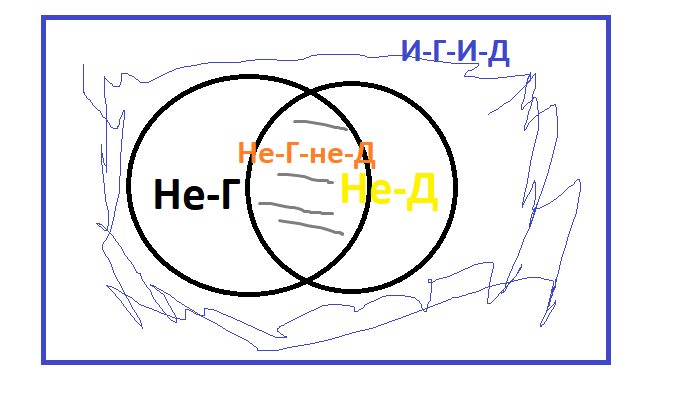

In [106]:
no_g = set("Вася Петя Таня Саня".split())
no_inc = set("Вася Петя Евграфий".split())
other = set("Антуан Людовик".split())

In [107]:
no_g

{'Вася', 'Петя', 'Саня', 'Таня'}

In [108]:
no_g.intersection(no_inc)

{'Вася', 'Петя'}

- Не сообщили ни гендера, ни дохода, сколько их? (Решение логическими выражениями для нашей таблички!)

Вот по отдельности:

In [43]:
star_wars["gender"].isna().sum()

140

In [44]:
star_wars["income"].isna().sum()

328

А вместе это просто И!

In [51]:
(star_wars["gender"].isna() & star_wars["income"].isna()).sum()

140

In [110]:
# чуть яснее, когда в несколько строк
(
 (star_wars["gender"].isna())
 & (star_wars["income"].isna())
).sum()

140

## Числовые столбцы

In [59]:
bikes = pd.read_csv("data/BikeData.csv")

bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,467,177
8756,30/11/2018,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,296,63
8757,30/11/2018,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,571,665
8758,30/11/2018,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,171,457


In [61]:
bikes[bikes["Temperature"] > 20]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
2485,14/03/2018,13,20.9,44,4.7,0.0,0.0,Spring,No Holiday,Yes,218,753
2486,14/03/2018,14,21.1,42,4.3,0.0,0.0,Spring,No Holiday,Yes,337,729
2487,14/03/2018,15,21.7,39,3.3,0.0,0.0,Spring,No Holiday,Yes,185,473
2488,14/03/2018,16,21.7,41,3.2,0.0,0.0,Spring,No Holiday,Yes,176,455
2489,14/03/2018,17,20.5,49,3.5,0.0,0.0,Spring,No Holiday,Yes,5,582
...,...,...,...,...,...,...,...,...,...,...,...,...
7814,22/10/2018,14,20.6,30,2.2,0.0,0.0,Autumn,No Holiday,Yes,38,599
7815,22/10/2018,15,20.2,31,1.6,0.0,0.0,Autumn,No Holiday,Yes,991,1029
7886,25/10/2018,14,20.6,31,1.4,0.0,0.0,Autumn,No Holiday,Yes,380,1084
7887,25/10/2018,15,20.6,32,1.4,0.0,0.0,Autumn,No Holiday,Yes,680,390


In [63]:
2844 / 24

118.5

In [65]:
bikes["Date"].unique()

array(['01/12/2017', '02/12/2017', '03/12/2017', '04/12/2017',
       '05/12/2017', '06/12/2017', '07/12/2017', '08/12/2017',
       '09/12/2017', '10/12/2017', '11/12/2017', '12/12/2017',
       '13/12/2017', '14/12/2017', '15/12/2017', '16/12/2017',
       '17/12/2017', '18/12/2017', '19/12/2017', '20/12/2017',
       '21/12/2017', '22/12/2017', '23/12/2017', '24/12/2017',
       '25/12/2017', '26/12/2017', '27/12/2017', '28/12/2017',
       '29/12/2017', '30/12/2017', '31/12/2017', '01/01/2018',
       '02/01/2018', '03/01/2018', '04/01/2018', '05/01/2018',
       '06/01/2018', '07/01/2018', '08/01/2018', '09/01/2018',
       '10/01/2018', '11/01/2018', '12/01/2018', '13/01/2018',
       '14/01/2018', '15/01/2018', '16/01/2018', '17/01/2018',
       '18/01/2018', '19/01/2018', '20/01/2018', '21/01/2018',
       '22/01/2018', '23/01/2018', '24/01/2018', '25/01/2018',
       '26/01/2018', '27/01/2018', '28/01/2018', '29/01/2018',
       '30/01/2018', '31/01/2018', '01/02/2018', '02/02

In [78]:
bikes.describe()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Partner 1,Partner 2
count,8760.000000,8581.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.878557,58.226256,1.724909,0.148687,0.075068,345.656507,350.925571
std,6.922582,11.955551,20.362413,1.036300,1.128193,0.436746,415.816299,425.687048
min,0.000000,-17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,3.400000,42.000000,0.900000,0.000000,0.000000,57.000000,56.000000
50%,11.500000,13.700000,57.000000,1.500000,0.000000,0.000000,186.000000,182.000000
75%,17.250000,22.500000,74.000000,2.300000,0.000000,0.000000,487.000000,499.250000
max,23.000000,39.400000,98.000000,7.400000,35.000000,8.800000,3101.000000,3039.000000


Средняя температура:

(среднегодовая)

In [66]:
bikes["Temperature"].mean()

12.878557277706562

In [69]:
bikes.groupby(["Seasons"])["Temperature"].mean()

Seasons
Autumn    14.138821
Spring    13.038533
Summer    26.574827
Winter    -2.567783
Name: Temperature, dtype: float64

In [71]:
bikes[["Temperature", "Humidity"]]

,Temperature,Humidity
0,-5.2,37
1,-5.5,38
2,-6.0,39
3,-6.2,40
4,-6.0,36
...,...,...
8755,4.2,34
8756,3.4,37
8757,2.6,39
8758,2.1,41


In [72]:
bikes.groupby(["Seasons"])[["Temperature", "Humidity", "Wind speed"]].mean()

,Temperature,Humidity,Wind speed
Seasons,,,
Autumn,14.138821,59.228480,1.494734
Spring,13.038533,58.776721,1.874592
Summer,26.574827,64.981431,1.609420
Winter,-2.567783,49.744907,1.922685


In [77]:
bikes.groupby(["Seasons"])[["Temperature", "Humidity", "Wind speed"]].std()

,Temperature,Humidity,Wind speed
Seasons,,,
Autumn,7.041986,18.686445,0.924440
Spring,6.607997,22.573616,1.071014
Summer,4.653581,17.570961,0.914289
Winter,5.466052,19.303054,1.156028


* *Для каждого человека исследователем выделен номер (видимо, для анонимизации).
  Эти номера как бы числа, но они не осмысливаются как числа, не складываются и нужны просто для указания на участника и различения участников.
  В целом это скорее похоже на 
  
  ✔ **Категориальную номинальную** переменную.

In [104]:
star_wars

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa,knows_yoda
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится,True
1,3292879538,нет,NaN,М,18-29,0 - 24.999,Юго-Западный центральный,NaN,NaN,False
2,3292765271,да,нет,М,18-29,0 - 24.999,Северо-Западный центральный,не знаю такого персонажа,нравится,False
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится,True
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится,True
...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,да,да,Ж,18-29,0 - 24.999,Северо-Восточный центральный,очень нравится,нравится,True
1182,3288378779,да,да,Ж,30-44,50.000 - 99.999,Горный,очень нравится,очень нравится,True
1183,3288375286,нет,NaN,Ж,30-44,50.000 - 99.999,Средне-Атлантический,NaN,NaN,False
1184,3288373068,да,да,Ж,45-60,100.000 - 149.999,Северо-Восточный центральный,очень нравится,очень нравится,True


(хотя `pandas` конечно может попробовать что-то для этих чисел посчитать, мы понимаем, что это бессмысленно и неинтерпретируемо, как среднее номеров квартир (?))

In [79]:
star_wars.describe()

,respondentID
count,1.186000e+03
mean,3.290128e+09
std,1.055639e+06
min,3.288373e+09
25%,3.289451e+09
50%,3.290147e+09
75%,3.290814e+09
max,3.292880e+09


3.292880*10^9 

3292880000

3288373068